# Simulating a quantum system (WIP)

MagPy uses a two-term Magnus expansion to evolve solutions to the Liouville-von Neumann equation,

$$\frac{\partial \rho(t)}{\partial t} = -i\,\big[H(t),\,\rho(t)\big],$$

given a Hamiltonian $H$, initial density matrix $\rho_0$, and discretised time interval $[t_0, t_f]$.

In [1]:
import magpy as mp
from magpy import X, Y
import numpy as np

H = np.sin*X() + 4*Y()
rho0 = Y()
tlist = mp.timegrid(0, 10, 0.5**6)

The `System` class represents a quantum system defined by the above equation and initial conditions.

The method `evolve` calculates the density matrix at each point in time and stores the result in the attribute `states`.

In [2]:
qsys = mp.System.create(H, rho0, tlist)
qsys.evolve()

## Visualising the states

Using the Frobenius inner product,

$$\langle A, B\rangle_\text{F} := \text{Tr}\big(A^\dagger B\big),$$

we can measure the magnitude of a single spin component, giving us a scalar value to plot over time.

MagPy provides a batch function which will calculate the inner product of all state matrices with the given spin component matrix.

For the $Y$ component of the system's spin,

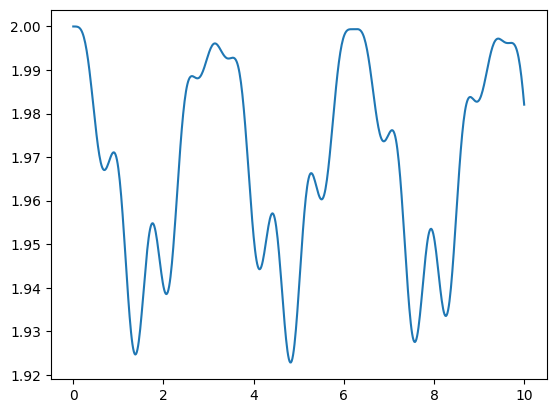

In [6]:
import matplotlib.pyplot as plt

y_component = mp.frobenius(qsys.states, Y()())
plt.plot(tlist, y_component)

Note: the double parentheses indicate that we are calling the `Y` function and then calling it's matrix representation.

## Utilising GPUs

MagPy supports calculations on GPUs via PyTorch and CUDA. The `set_device` function is used to specify the device, where the default value is `cpu`.

In [4]:
import torch

mp.set_device('cuda')     # Default CUDA device
mp.set_device('cuda:0')   # First available GPU

When using the solvers on a GPU, time-dependent Hamiltonians must contain only `torch` functions.

In [7]:
H = torch.sin*X() + 4*Y()